In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [300]:
file_path = '~/aiffel/AIFFEL_repo/netflix_titles.csv'
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [301]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [302]:
data = data.dropna(subset=['release_year'])

In [303]:
data = data.sort_values( 'release_year', ascending = False )
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,"June 17, 2021",2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou..."
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,"June 2, 2021",2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,"June 4, 2021",2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,"June 4, 2021",2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn..."


In [304]:
data['2010-2021'] = np.where( data['release_year'] == 2022 , '22' ,  np.where( data['release_year'] == 2021, '21',  np.where( data['release_year'] == 2020, '20',  np.where( data['release_year'] == 2019, '19', np.where( data['release_year'] == 2018, '18',  np.where( data['release_year'] == 2017, '17', np.where( data['release_year'] == 2016, '16',  np.where( data['release_year'] == 2015, '15', np.where( data['release_year'] == 2014, '14', np.where( data['release_year'] == 2013, '13', np.where( data['release_year'] == 2012, '12', np.where( data['release_year'] == 2011, '11', np.where( data['release_year'] == 2010, '10', '09~' )))))))))))))

<AxesSubplot:xlabel='2010-2021', ylabel='count'>

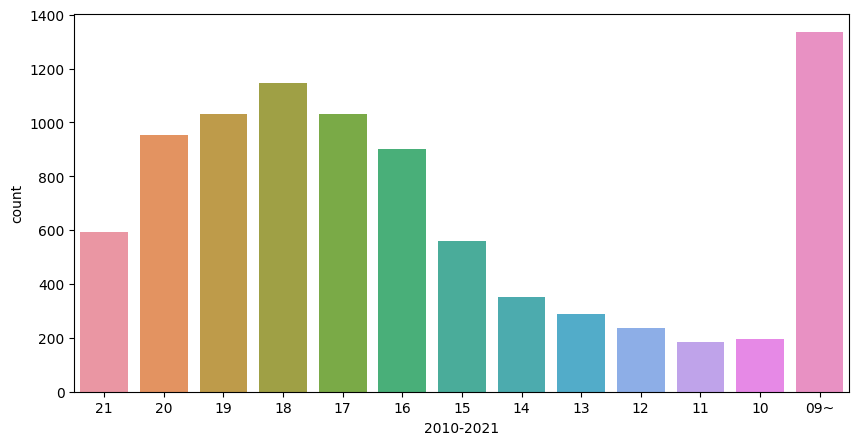

In [305]:
sns.countplot(data = data, x='2010-2021') # 2010년~2021년 사이의 작품의 개수

In [306]:
data['description'] = data['description'].str.replace('[^A-Za-z]',' ', regex=True) # 알파벳만 남김.
data['description'] 

693     After his father s passing  a teenager sets ou...
781     Follow scientists on their quest to understand...
762     Faced with real world opportunities and challe...
763     On a perilous adventure across a post apocalyp...
764     To rekindle their marriages  best friends turn...
                              ...                        
8660    This World War II era training film dramatizes...
8763    Filmmaker John Huston narrates this Oscar nomi...
8205    Director John Ford captures combat footage of ...
7790    Frank Capra s documentary chronicles the rise ...
4250    This collection restores films from women who ...
Name: description, Length: 8807, dtype: object

In [307]:
content= ' '.join(data['description']) #모든 문장들을 하나로 합침.

In [308]:
import nltk 
import pickle
from nltk.corpus import stopwords
import re

In [309]:
refined_content = content.lower() # 모두 소문자로 전환해줌.
word_tokens = nltk.word_tokenize(refined_content) # 단어 토큰으로 쪼개줌.

In [310]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'john','filmmaker','era','ii','huston','story','year','group','man','series','way','time'] # 직접 만든 불용어 사전
refined_word = [word  for  word  in  word_tokens  if not  word  in stopwords]   # 불용어 제거

In [409]:
tagged_word = nltk.pos_tag(refined_word) # 품사를 각각 태그해줌.
tagged_word

[('father', 'RB'),
 ('passing', 'VBG'),
 ('teenager', 'JJR'),
 ('sets', 'NNS'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('search', 'NN'),
 ('estranged', 'VBD'),
 ('mother', 'RB'),
 ('soon', 'RB'),
 ('finds', 'VBZ'),
 ('love', 'JJ'),
 ('connection', 'NN'),
 ('unexpected', 'VBD'),
 ('places', 'NNS'),
 ('follow', 'JJ'),
 ('scientists', 'NNS'),
 ('quest', 'JJS'),
 ('understand', 'NN'),
 ('capture', 'NN'),
 ('first', 'JJ'),
 ('image', 'NN'),
 ('black', 'JJ'),
 ('hole', 'NN'),
 ('exploring', 'VBG'),
 ('limits', 'NNS'),
 ('knowledge', 'VBP'),
 ('universe', 'RB'),
 ('faced', 'VBN'),
 ('real', 'JJ'),
 ('world', 'NN'),
 ('opportunities', 'NNS'),
 ('challenges', 'VBZ'),
 ('couple', 'JJ'),
 ('endures', 'NNS'),
 ('highs', 'NNS'),
 ('lows', 'NNS'),
 ('trying', 'VBG'),
 ('make', 'VBP'),
 ('long', 'JJ'),
 ('distance', 'NN'),
 ('relationship', 'NN'),
 ('survive', 'VBP'),
 ('perilous', 'JJ'),
 ('adventure', 'NN'),
 ('across', 'IN'),
 ('post', 'NN'),
 ('apocalyptic', 'JJ'),
 ('world', 'NN'),
 ('lovable', 'JJ')

In [312]:
NN_words = []
for word, tag in tagged_word:
    if 'NN' in tag:
        NN_words.append(word)  #명사(NN)만 추출함.

In [313]:
wlem = nltk.WordNetLemmatizer() 

nlp_words = []
for word in NN_words:
    original_word = wlem.lemmatize(word)  # 각 단어의 원형을 찾아줌.
    nlp_words.append(original_word)

In [314]:
from collections import Counter
word_counts = Counter(nlp_words)
print(word_counts.most_common(20)) # 빈도수 기준 상위 20개 단어 출력

[('life', 984), ('family', 712), ('woman', 665), ('world', 590), ('friend', 542), ('school', 347), ('home', 313), ('year', 252), ('team', 243), ('student', 243), ('city', 231), ('crime', 224), ('town', 219), ('murder', 217), ('day', 214), ('war', 213), ('death', 212), ('girl', 206), ('love', 201), ('son', 200)]


In [315]:
df_word = pd.DataFrame({'word':nlp_words})
df_word

,word
0,set
1,york
2,search
3,connection
4,place
...,...
62159,issue
62160,norm
62161,history
62162,cinema


In [316]:
freq_word = df_word.groupby('word', as_index = False).agg(frequency = ('word','count')).sort_values('frequency',ascending = False)
top15 = freq_word.head(15)
top15

,word,frequency
5189,life,984
3186,family,712
9620,woman,665
9643,world,590
3503,friend,542
7755,school,347
4198,home,313
9703,year,252
8755,team,243
8516,student,243


<AxesSubplot:xlabel='frequency', ylabel='word'>

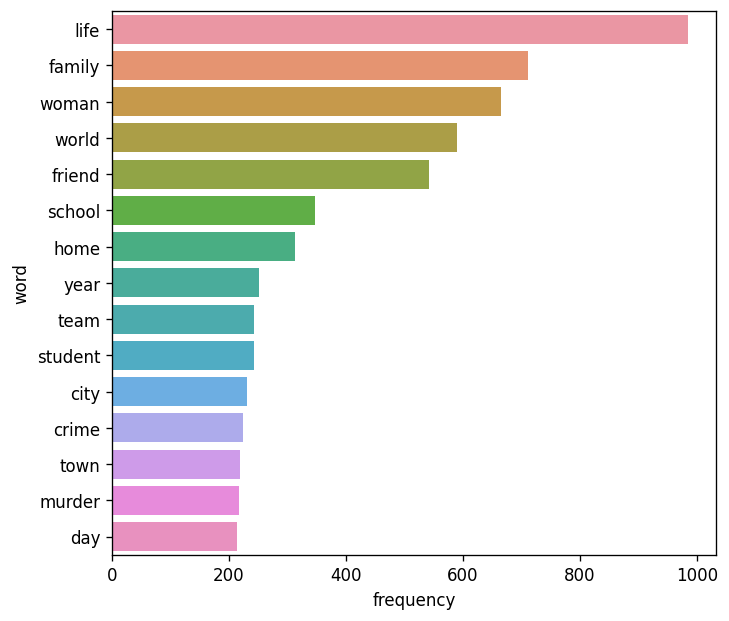

In [317]:
plt.rcParams.update({'font.family' : 'Malgun Gothic',
                     'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

sns.barplot(data = top15, x='frequency', y='word')

In [318]:
dic_word = freq_word.set_index('word').to_dict()['frequency']
dic_word

{'life': 984,
 'family': 712,
 'woman': 665,
 'world': 590,
 'friend': 542,
 'school': 347,
 'home': 313,
 'year': 252,
 'team': 243,
 'student': 243,
 'city': 231,
 'crime': 224,
 'town': 219,
 'murder': 217,
 'day': 214,
 'war': 213,
 'death': 212,
 'girl': 206,
 'love': 201,
 'son': 200,
 'star': 198,
 'power': 197,
 'wife': 196,
 'help': 194,
 'brother': 190,
 'daughter': 190,
 'force': 179,
 'film': 176,
 'show': 169,
 'relationship': 166,
 'comedy': 165,
 'try': 164,
 'adventure': 162,
 'father': 162,
 'drug': 161,
 'battle': 160,
 'boy': 158,
 'child': 158,
 'story': 153,
 'find': 148,
 'game': 146,
 'couple': 145,
 'mother': 145,
 'romance': 145,
 'mission': 145,
 'plan': 142,
 'journey': 142,
 'meet': 137,
 'return': 136,
 'event': 135,
 'history': 134,
 'people': 132,
 'set': 130,
 'marriage': 130,
 'college': 130,
 'cop': 129,
 'career': 129,
 'share': 126,
 'dream': 126,
 'agent': 126,
 'job': 126,
 'music': 124,
 'drama': 122,
 'kid': 122,
 'night': 121,
 'police': 119,
 '

In [319]:
from wordcloud import WordCloud
wc = WordCloud(random_state = 1234,
              font_path = 'THEBOLDFONT.ttf',
              width=400,
              height=400,
              background_color = 'white')

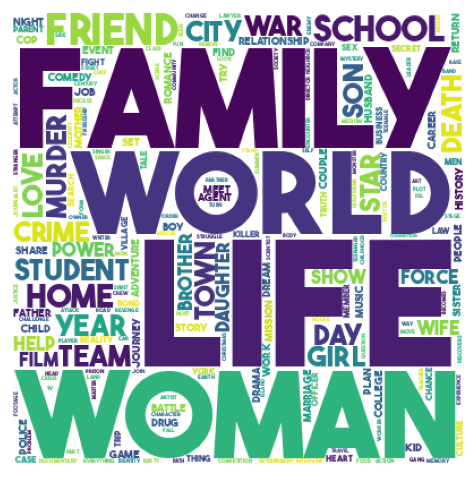

In [320]:
img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(img_wordcloud)

In [467]:
data = data.rename(columns = {'listed_in': 'genre'})
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,2010-2021
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real world opportunities and challe...,21
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,"June 4, 2021",2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post apocalyp...,21
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,"June 4, 2021",2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies",To rekindle their marriages best friends turn...,21
765,s766,Movie,Xtreme,Daniel Benmayor,"Teo García, Óscar Jaenada, Óscar Casas, Andrea...",Spain,"June 4, 2021",2021,TV-MA,112 min,"Action & Adventure, International Movies",In this fast paced and action packed thriller ...,21
766,s767,Movie,Alan Saldaña: Locked Up,Alex Díaz,Alan Saldaña,Mexico,"June 3, 2021",2021,TV-MA,49 min,Stand-Up Comedy,Mexican comedian Alan Salda a is back poking ...,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra s acclaimed do...,09~
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II era training film dramatizes...,09~
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar nomi...,09~
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,09~


In [468]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7976 entries, 762 to 7790
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7976 non-null   object
 1   type          7976 non-null   object
 2   title         7976 non-null   object
 3   director      5751 non-null   object
 4   cast          7305 non-null   object
 5   country       7976 non-null   object
 6   date_added    7967 non-null   object
 7   release_year  7976 non-null   int64 
 8   rating        7973 non-null   object
 9   duration      7973 non-null   object
 10  genre         7976 non-null   object
 11  description   7976 non-null   object
 12  2010-2021     7976 non-null   object
dtypes: int64(1), object(12)
memory usage: 872.4+ KB


In [469]:
pd.isna(data).sum()

show_id            0
type               0
title              0
director        2225
cast             671
country            0
date_added         9
release_year       0
rating             3
duration           3
genre              0
description        0
2010-2021          0
dtype: int64

In [470]:
data = data.dropna(subset=['country']) # country컬럼의 결측치만 제거

In [471]:
data_two = data[['country','genre']]
data_two

,country,genre
762,South Korea,"Comedies, International Movies, Romantic Movies"
763,United States,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ..."
764,South Africa,"Comedies, International Movies, Romantic Movies"
765,Spain,"Action & Adventure, International Movies"
766,Mexico,Stand-Up Comedy
...,...,...
8739,United States,Documentaries
8660,United States,"Classic Movies, Documentaries"
8763,United States,Documentaries
8205,United States,"Classic Movies, Documentaries"


In [472]:
data_two.dtypes

country    object
genre      object
dtype: object

In [473]:
df_str = data_two.astype('string') # 문자열 타입으로 변경
df_str

,country,genre
762,South Korea,"Comedies, International Movies, Romantic Movies"
763,United States,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ..."
764,South Africa,"Comedies, International Movies, Romantic Movies"
765,Spain,"Action & Adventure, International Movies"
766,Mexico,Stand-Up Comedy
...,...,...
8739,United States,Documentaries
8660,United States,"Classic Movies, Documentaries"
8763,United States,Documentaries
8205,United States,"Classic Movies, Documentaries"


In [474]:
df_str.dtypes 

country    string
genre      string
dtype: object

In [475]:
df_str["country"] = df_str["country"].str.replace(" ", "") # 공백제거
df_str["genre"] = df_str["genre"].str.replace(" ", "")
df_str

,country,genre
762,SouthKorea,"Comedies,InternationalMovies,RomanticMovies"
763,UnitedStates,"TVAction&Adventure,TVDramas,TVSci-Fi&Fantasy"
764,SouthAfrica,"Comedies,InternationalMovies,RomanticMovies"
765,Spain,"Action&Adventure,InternationalMovies"
766,Mexico,Stand-UpComedy
...,...,...
8739,UnitedStates,Documentaries
8660,UnitedStates,"ClassicMovies,Documentaries"
8763,UnitedStates,Documentaries
8205,UnitedStates,"ClassicMovies,Documentaries"


In [476]:
extracted_df = df_str.query("country == 'UnitedStates' | country == 'SouthKorea' | country == 'Finland' | country == 'Poland' | country == 'Norway' | country == 'India' | country == 'UnitedKingdom' | country == 'Germany' | country == 'Australia' | country == 'Japan' | country == 'France' | country == 'Spain' | country == 'Italy' | country == 'Thailand' | country == 'Taiwan' | country == 'China' | country == 'Canada'")
extracted_df  # 해당하는 국가의 행만 추출


,country,genre
762,SouthKorea,"Comedies,InternationalMovies,RomanticMovies"
763,UnitedStates,"TVAction&Adventure,TVDramas,TVSci-Fi&Fantasy"
765,Spain,"Action&Adventure,InternationalMovies"
767,Japan,"InternationalTVShows,TVComedies"
772,Italy,"InternationalTVShows,RomanticTVShows,TVDramas"
...,...,...
8739,UnitedStates,Documentaries
8660,UnitedStates,"ClassicMovies,Documentaries"
8763,UnitedStates,Documentaries
8205,UnitedStates,"ClassicMovies,Documentaries"


In [477]:
extracted_df['genre'] = np.where(extracted_df['genre'].str.contains(','), np.nan, extracted_df['genre']) # 장르가 여러개인 경우 (쉼표를 포함하는 경우) 결측처리함.
extracted_df

/tmp/ipykernel_80/640508916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['genre'] = np.where(extracted_df['genre'].str.contains(','), np.nan, extracted_df['genre']) # 장르가 여러개인 경우 (쉼표를 포함하는 경우) 결측처리함.


,country,genre
762,SouthKorea,NaN
763,UnitedStates,NaN
765,Spain,NaN
767,Japan,NaN
772,Italy,NaN
...,...,...
8739,UnitedStates,Documentaries
8660,UnitedStates,NaN
8763,UnitedStates,Documentaries
8205,UnitedStates,NaN


In [478]:
extracted_df['genre'] = np.where(extracted_df['genre'] =='AnimeFeatures', 'AnimeSeries' , extracted_df['genre']) # AnimeFeatures -> AnimeSeries
extracted_df['genre'] = np.where(extracted_df['genre'] =='Documentaries', 'Docuseries', extracted_df['genre']) # Documentaries -> Docuseries
extracted_df['genre'] = np.where(extracted_df['genre'] =='Stand-UpComedy', 'Comedies', extracted_df['genre']) # Stand-UpComedy -> Comedies
extracted_df['genre'] = np.where(extracted_df['genre'] =='TVComedies', 'Comedies', extracted_df['genre']) # TVComedies -> Comedies
extracted_df['genre'] = np.where(extracted_df['genre'] =='TVAction&Adventure', 'Action&Adventure', extracted_df['genre']) # TVAction&Adventure -> Action&Adventure
extracted_df['genre'] = np.where(extracted_df['genre'] =='TVDramas', 'Dramas', extracted_df['genre']) # TVDramas -> Dramas
extracted_df['genre'] = np.where(extracted_df['genre'] =='Stand-UpComedy&TalkShows', 'TalkShows', extracted_df['genre']) #Stand-UpComedy&TalkShows -> TalkShows
extracted_df['genre'] = np.where(extracted_df['genre'] =='TVShows', 'TelevisionProgram', extracted_df['genre']) # TVShows -> TelevisionProgram
extracted_df['genre'] = np.where(extracted_df['genre'] =='Movies', np.nan, extracted_df['genre']) # Movies 제거
extracted_df['genre'] = np.where(extracted_df['genre'] =='InternationalMovies', np.nan, extracted_df['genre']) # InternationalMovies 제거
extracted_df['genre'] = np.where(extracted_df['genre'] =='InternationalTVShows', np.nan, extracted_df['genre']) # InternationalTVShows 제거
extracted_df['genre'] = np.where(extracted_df['genre'] =='RealityTV', 'Reality', extracted_df['genre']) # RealityTV -> RealityShow
extracted_df

/tmp/ipykernel_80/2296201502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['genre'] = np.where(extracted_df['genre'] =='AnimeFeatures', 'AnimeSeries' , extracted_df['genre']) # AnimeFeatures -> AnimeSeries
/tmp/ipykernel_80/2296201502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['genre'] = np.where(extracted_df['genre'] =='Documentaries', 'Docuseries', extracted_df['genre']) # Documentaries -> Docuseries
/tmp/ipykernel_80/2296201502.py:3: SettingWithCopyWarning: 
A val

,country,genre
762,SouthKorea,NaN
763,UnitedStates,NaN
765,Spain,NaN
767,Japan,NaN
772,Italy,NaN
...,...,...
8739,UnitedStates,Docuseries
8660,UnitedStates,NaN
8763,UnitedStates,Docuseries
8205,UnitedStates,NaN


In [479]:
extracted_df = extracted_df.dropna() # 결측치인 행 제거
extracted_df

,country,genre
785,UnitedStates,Kids'TV
826,UnitedStates,Comedies
757,UnitedStates,Docuseries
719,UnitedStates,Kids'TV
728,UnitedStates,HorrorMovies
...,...,...
716,UnitedStates,Docuseries
7743,UnitedStates,TelevisionProgram
1331,UnitedStates,TelevisionProgram
8739,UnitedStates,Docuseries


In [480]:
extracted_df = extracted_df.sort_values('country', ascending = False ) # 국가명으로 내림차순 정렬
extracted_df

,country,genre
785,UnitedStates,Kids'TV
3321,UnitedStates,Children&FamilyMovies
7516,UnitedStates,Dramas
7561,UnitedStates,Docuseries
7580,UnitedStates,Docuseries
...,...,...
6869,Australia,Thrillers
8269,Australia,Dramas
5494,Australia,Kids'TV
4746,Australia,Comedies


In [481]:
extracted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 785 to 4823
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  1402 non-null   string
 1   genre    1402 non-null   object
dtypes: object(1), string(1)
memory usage: 32.9+ KB


In [482]:
extracted_df = extracted_df.astype('object')

In [483]:
extracted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 785 to 4823
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  1402 non-null   object
 1   genre    1402 non-null   object
dtypes: object(2)
memory usage: 32.9+ KB


In [484]:
onehot_df = pd.get_dummies(extracted_df) # 원핫인코딩
onehot_df

,country_Australia,country_Canada,country_China,country_France,country_Germany,country_India,country_Italy,country_Japan,country_SouthKorea,country_Spain,...,genre_IndependentMovies,genre_Kids'TV,genre_Music&Musicals,genre_Reality,genre_RomanticMovies,genre_Sci-Fi&Fantasy,genre_SportsMovies,genre_TalkShows,genre_TelevisionProgram,genre_Thrillers
785,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6869,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8269,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5494,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4746,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [485]:
corr_df = onehot_df.corr()
corr_df

,country_Australia,country_Canada,country_China,country_France,country_Germany,country_India,country_Italy,country_Japan,country_SouthKorea,country_Spain,...,genre_IndependentMovies,genre_Kids'TV,genre_Music&Musicals,genre_Reality,genre_RomanticMovies,genre_Sci-Fi&Fantasy,genre_SportsMovies,genre_TalkShows,genre_TelevisionProgram,genre_Thrillers
country_Australia,1.000000,-0.021212,-0.003931,-0.011173,-0.006221,-0.012824,-0.007878,-0.006818,-0.003931,-0.004816,...,-0.002778,0.046537,-0.006818,0.064785,-0.004816,-0.002778,-0.002778,-0.006818,-0.007878,0.017960
country_Canada,-0.021212,1.000000,-0.007709,-0.021915,-0.012203,-0.025153,-0.015452,-0.013372,-0.007709,-0.009445,...,-0.005449,0.048109,-0.013372,-0.018252,0.069379,-0.005449,-0.005449,-0.013372,-0.015452,0.000849
country_China,-0.003931,-0.007709,1.000000,-0.004061,-0.002261,-0.004661,-0.002863,-0.002478,-0.001429,-0.001750,...,-0.001010,0.058909,-0.002478,-0.009236,-0.001750,-0.001010,-0.001010,-0.002478,-0.002863,-0.007193
country_France,-0.011173,-0.021915,-0.004061,1.000000,-0.006428,-0.013249,-0.008139,-0.007044,-0.004061,-0.004975,...,-0.002871,0.217199,-0.007044,-0.026255,-0.004975,-0.002871,-0.002871,-0.007044,-0.008139,-0.020447
country_Germany,-0.006221,-0.012203,-0.002261,-0.006428,1.000000,-0.007377,-0.004532,-0.003922,-0.002261,-0.002770,...,-0.001598,-0.017542,-0.003922,-0.014619,-0.002770,-0.001598,-0.001598,-0.003922,-0.004532,-0.011385
country_India,-0.012824,-0.025153,-0.004661,-0.013249,-0.007377,1.000000,-0.009342,-0.008084,-0.004661,-0.005710,...,-0.003295,0.029085,-0.008084,-0.004668,-0.005710,-0.003295,-0.003295,-0.008084,0.224535,-0.023467
country_Italy,-0.007878,-0.015452,-0.002863,-0.008139,-0.004532,-0.009342,1.000000,-0.004966,-0.002863,-0.003508,...,-0.002024,0.082999,-0.004966,-0.018512,-0.003508,-0.002024,-0.002024,-0.004966,-0.005739,-0.014417
country_Japan,-0.006818,-0.013372,-0.002478,-0.007044,-0.003922,-0.008084,-0.004966,1.000000,-0.002478,-0.003036,...,-0.001752,0.021244,-0.004298,-0.016020,-0.003036,-0.001752,-0.001752,-0.004298,0.140095,-0.012476
country_SouthKorea,-0.003931,-0.007709,-0.001429,-0.004061,-0.002261,-0.004661,-0.002863,-0.002478,1.000000,-0.001750,...,-0.001010,-0.011083,-0.002478,-0.009236,-0.001750,-0.001010,-0.001010,-0.002478,-0.002863,-0.007193
country_Spain,-0.004816,-0.009445,-0.001750,-0.004975,-0.002770,-0.005710,-0.003508,-0.003036,-0.001750,1.000000,...,-0.001237,0.043590,-0.003036,-0.011316,-0.002144,-0.001237,-0.001237,-0.003036,-0.003508,0.075236


In [486]:
type(corr_df)

pandas.core.frame.DataFrame

In [487]:
corr_df = corr_df.iloc[:12, 12:]
corr_df

,genre_Action&Adventure,genre_AnimeSeries,genre_Children&FamilyMovies,genre_Comedies,genre_Docuseries,genre_Dramas,genre_HorrorMovies,genre_IndependentMovies,genre_Kids'TV,genre_Music&Musicals,genre_Reality,genre_RomanticMovies,genre_Sci-Fi&Fantasy,genre_SportsMovies,genre_TalkShows,genre_TelevisionProgram,genre_Thrillers
country_Australia,-0.025241,-0.007367,-0.029893,0.023870,-0.061354,-0.008893,0.023098,-0.002778,0.046537,-0.006818,0.064785,-0.004816,-0.002778,-0.002778,-0.006818,-0.007878,0.017960
country_Canada,0.029945,-0.014449,0.160864,-0.092113,-0.037113,-0.001425,0.007833,-0.005449,0.048109,-0.013372,-0.018252,0.069379,-0.005449,-0.005449,-0.013372,-0.015452,0.000849
country_China,0.073274,-0.002677,-0.010864,-0.024467,-0.022299,-0.011980,-0.006560,-0.001010,0.058909,-0.002478,-0.009236,-0.001750,-0.001010,-0.001010,-0.002478,-0.002863,-0.007193
country_France,-0.026078,-0.007611,-0.005592,0.004053,-0.063389,-0.034056,-0.018648,-0.002871,0.217199,-0.007044,-0.026255,-0.004975,-0.002871,-0.002871,-0.007044,-0.008139,-0.020447
country_Germany,-0.014521,-0.004238,-0.017197,0.092420,-0.035296,-0.018963,-0.010384,-0.001598,-0.017542,-0.003922,-0.014619,-0.002770,-0.001598,-0.001598,-0.003922,-0.004532,-0.011385
country_India,-0.029931,-0.008735,0.119369,-0.002589,-0.072753,-0.018700,-0.021403,-0.003295,0.029085,-0.008084,-0.004668,-0.005710,-0.003295,-0.003295,-0.008084,0.224535,-0.023467
country_Italy,-0.018387,-0.005366,-0.021776,0.033995,-0.044694,0.008864,-0.013149,-0.002024,0.082999,-0.004966,-0.018512,-0.003508,-0.002024,-0.002024,-0.004966,-0.005739,-0.014417
country_Japan,-0.015912,0.615444,-0.018845,-0.042438,-0.038679,-0.020780,-0.011379,-0.001752,0.021244,-0.004298,-0.016020,-0.003036,-0.001752,-0.001752,-0.004298,0.140095,-0.012476
country_SouthKorea,-0.009174,-0.002677,-0.010864,0.058389,-0.022299,-0.011980,-0.006560,-0.001010,-0.011083,-0.002478,-0.009236,-0.001750,-0.001010,-0.001010,-0.002478,-0.002863,-0.007193
country_Spain,-0.011240,-0.003280,-0.013311,0.003862,-0.027321,-0.014678,-0.008037,-0.001237,0.043590,-0.003036,-0.011316,-0.002144,-0.001237,-0.001237,-0.003036,-0.003508,0.075236


In [488]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, country_Australia to country_UnitedStates
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   genre_Action&Adventure       12 non-null     float64
 1   genre_AnimeSeries            12 non-null     float64
 2   genre_Children&FamilyMovies  12 non-null     float64
 3   genre_Comedies               12 non-null     float64
 4   genre_Docuseries             12 non-null     float64
 5   genre_Dramas                 12 non-null     float64
 6   genre_HorrorMovies           12 non-null     float64
 7   genre_IndependentMovies      12 non-null     float64
 8   genre_Kids'TV                12 non-null     float64
 9   genre_Music&Musicals         12 non-null     float64
 10  genre_Reality                12 non-null     float64
 11  genre_RomanticMovies         12 non-null     float64
 12  genre_Sci-Fi&Fantasy         12 non-null     float6

<AxesSubplot:>

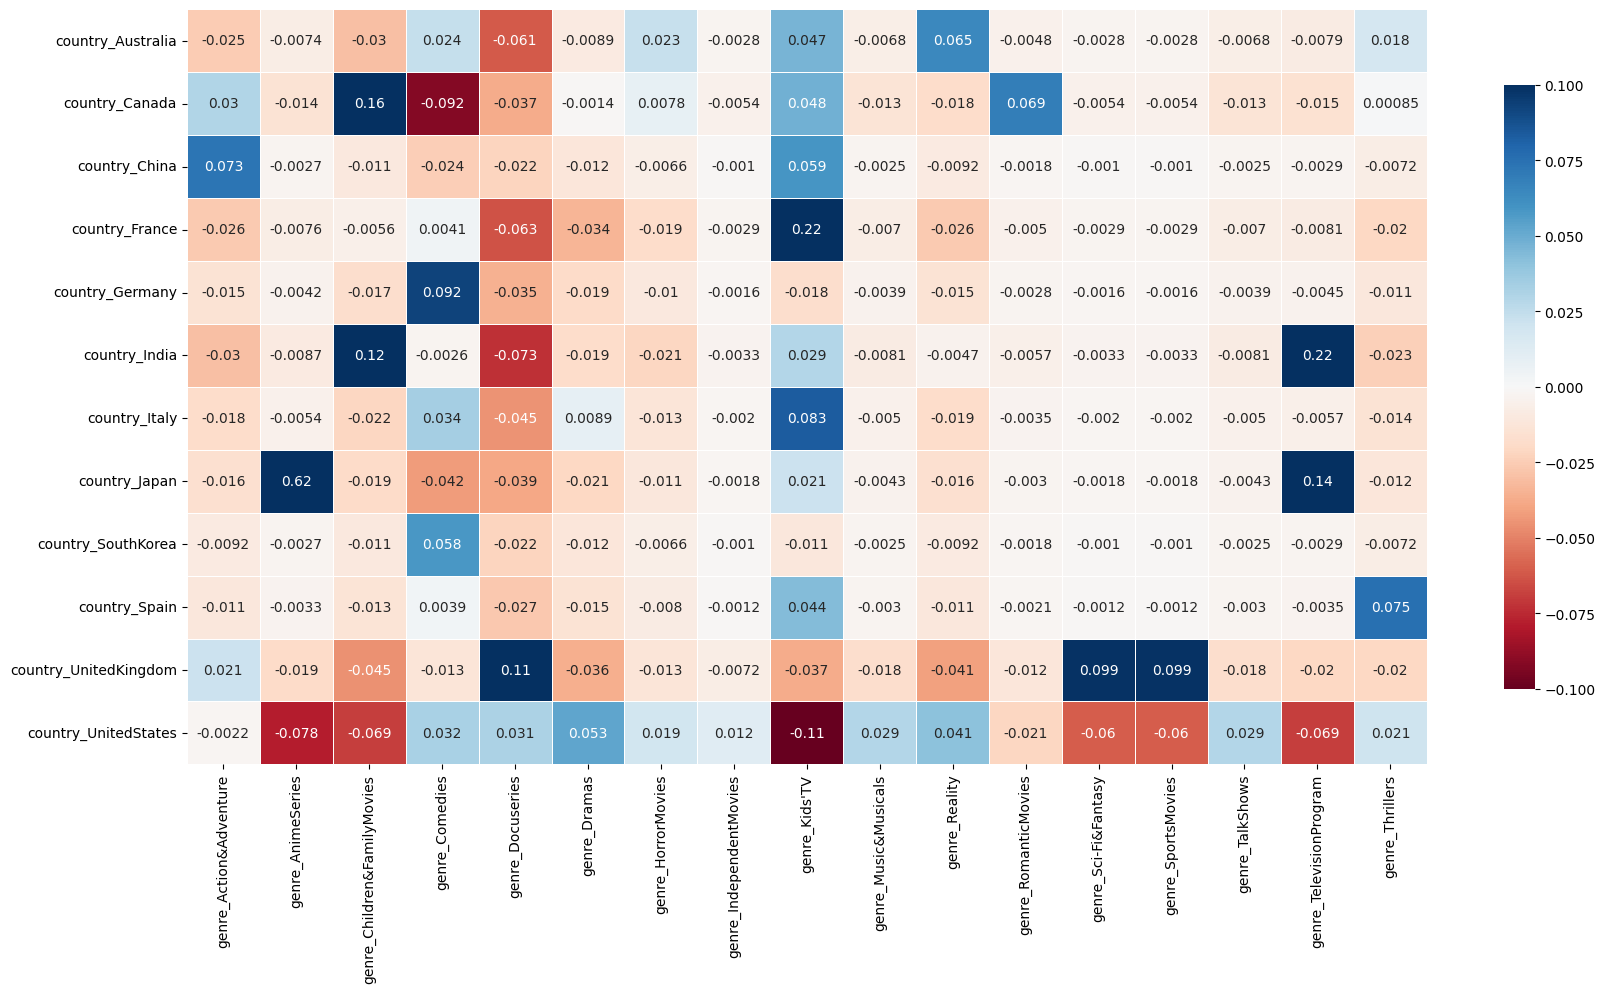

In [489]:
plt.rcParams.update({'figure.dpi':'100',
                    'figure.figsize':[20, 10]})

sns.heatmap(data= corr_df,
           annot = True, # 상관계수 표시
            linewidths = .5,
            vmax = 0.1,
            vmin = -0.1,
            cbar_kws = {"shrink": .8},
           cmap = 'RdBu') 